### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions

### Reading the data

In [2]:
file_path = r"/home/ayush/Projects_1/flight-prediction/data/train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-06,Delhi,Cochin,07:00:00,19:00:00,720,1.0,No Info,12192
1,Indigo,2019-04-15,Kolkata,Banglore,06:20:00,10:30:00,250,1.0,No Info,4226
2,Indigo,2019-03-01,Chennai,Kolkata,11:35:00,14:00:00,145,0.0,No Info,7900
3,Jet Airways,2019-06-03,Delhi,Cochin,18:25:00,12:35:00,1090,2.0,No Info,14237
4,Jet Airways,2019-05-09,Delhi,Cochin,05:30:00,12:35:00,425,2.0,In-flight meal not included,15544
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-18,Banglore,Delhi,06:00:00,08:45:00,165,0.0,No Info,7229
636,Indigo,2019-05-09,Delhi,Cochin,07:15:00,12:30:00,315,1.0,No Info,5636
637,Multiple Carriers,2019-05-27,Delhi,Cochin,10:00:00,01:30:00,930,1.0,No Info,9508
638,Jet Airways,2019-05-21,Kolkata,Banglore,21:10:00,22:35:00,1525,1.0,In-flight meal not included,10844


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [7]:
train = train.assign(
    **{
        col: pd.to_datetime(train.loc[:,col], format = 'mixed')
        for col in ["date_of_journey","dep_time","arrival_time"]
    }
)
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [8]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-06,Delhi,Cochin,2025-08-17 07:00:00,2025-08-17 19:00:00,720,1.0,No Info,12192
1,Indigo,2019-04-15,Kolkata,Banglore,2025-08-17 06:20:00,2025-08-17 10:30:00,250,1.0,No Info,4226
2,Indigo,2019-03-01,Chennai,Kolkata,2025-08-17 11:35:00,2025-08-17 14:00:00,145,0.0,No Info,7900
3,Jet Airways,2019-06-03,Delhi,Cochin,2025-08-17 18:25:00,2025-08-17 12:35:00,1090,2.0,No Info,14237
4,Jet Airways,2019-05-09,Delhi,Cochin,2025-08-17 05:30:00,2025-08-17 12:35:00,425,2.0,In-flight meal not included,15544
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-18,Banglore,Delhi,2025-08-17 06:00:00,2025-08-17 08:45:00,165,0.0,No Info,7229
636,Indigo,2019-05-09,Delhi,Cochin,2025-08-17 07:15:00,2025-08-17 12:30:00,315,1.0,No Info,5636
637,Multiple Carriers,2019-05-27,Delhi,Cochin,2025-08-17 10:00:00,2025-08-17 01:30:00,930,1.0,No Info,9508
638,Jet Airways,2019-05-21,Kolkata,Banglore,2025-08-17 21:10:00,2025-08-17 22:35:00,1525,1.0,In-flight meal not included,10844


### High-level summary of data

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [12]:
train.describe(include = "number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,637.414062,0.814063,9301.953125
std,495.035756,0.636493,5344.694987
min,80.000000,0.000000,1965.000000
25%,175.000000,0.000000,5415.000000
50%,520.000000,1.000000,8465.500000
75%,910.000000,1.000000,12375.750000
max,2565.000000,3.000000,54826.000000


In [11]:
train.describe(include = "O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,231,283,283,495


In [13]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include = "O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,231,283,283,368.0,495


### High-Level analysis of missing data

In [14]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


### High-level analysis of Outliers

##### algorithm for outliers is isloation forest

In [16]:
from sklearn.ensemble import IsolationForest
forest = IsolationForest(
    n_estimators = 10,
    random_state=42
)

In [18]:
(
    train
    .assign(outlier = forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include=["number"]
    ))
    # .query("outlier == -1")

)  
)  

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Multiple Carriers,2019-06-06,Delhi,Cochin,2025-08-17 07:00:00,2025-08-17 19:00:00,720,1.0,No Info,12192,1
1,Indigo,2019-04-15,Kolkata,Banglore,2025-08-17 06:20:00,2025-08-17 10:30:00,250,1.0,No Info,4226,-1
2,Indigo,2019-03-01,Chennai,Kolkata,2025-08-17 11:35:00,2025-08-17 14:00:00,145,0.0,No Info,7900,-1
3,Jet Airways,2019-06-03,Delhi,Cochin,2025-08-17 18:25:00,2025-08-17 12:35:00,1090,2.0,No Info,14237,-1
4,Jet Airways,2019-05-09,Delhi,Cochin,2025-08-17 05:30:00,2025-08-17 12:35:00,425,2.0,In-flight meal not included,15544,-1
...,...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-18,Banglore,Delhi,2025-08-17 06:00:00,2025-08-17 08:45:00,165,0.0,No Info,7229,1
636,Indigo,2019-05-09,Delhi,Cochin,2025-08-17 07:15:00,2025-08-17 12:30:00,315,1.0,No Info,5636,1
637,Multiple Carriers,2019-05-27,Delhi,Cochin,2025-08-17 10:00:00,2025-08-17 01:30:00,930,1.0,No Info,9508,1
638,Jet Airways,2019-05-21,Kolkata,Banglore,2025-08-17 21:10:00,2025-08-17 22:35:00,1525,1.0,In-flight meal not included,10844,-1


In [20]:
(
    train
    .assign(
        outlier = forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include=["number"])))  
    .query("outlier == -1")
)  

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Indigo,2019-04-15,Kolkata,Banglore,2025-08-17 06:20:00,2025-08-17 10:30:00,250,1.0,No Info,4226,-1
2,Indigo,2019-03-01,Chennai,Kolkata,2025-08-17 11:35:00,2025-08-17 14:00:00,145,0.0,No Info,7900,-1
3,Jet Airways,2019-06-03,Delhi,Cochin,2025-08-17 18:25:00,2025-08-17 12:35:00,1090,2.0,No Info,14237,-1
4,Jet Airways,2019-05-09,Delhi,Cochin,2025-08-17 05:30:00,2025-08-17 12:35:00,425,2.0,In-flight meal not included,15544,-1
7,Air India,2019-03-09,Delhi,Cochin,2025-08-17 16:40:00,2025-08-17 19:15:00,1595,2.0,No Info,11911,-1
...,...,...,...,...,...,...,...,...,...,...,...
628,Indigo,2019-06-01,Mumbai,Hyderabad,2025-08-17 21:20:00,2025-08-17 22:50:00,90,0.0,No Info,2227,-1
629,Spicejet,2019-06-27,Delhi,Cochin,2025-08-17 17:55:00,2025-08-17 22:50:00,295,1.0,No Info,4957,-1
631,Air India,2019-03-01,Banglore,New Delhi,2025-08-17 10:30:00,2025-08-17 21:25:00,655,2.0,No Info,11213,-1
632,Air India,2019-05-01,Kolkata,Banglore,2025-08-17 10:00:00,2025-08-17 13:45:00,1665,2.0,No Info,15164,-1


In [21]:
#  220 rows are outliers

### Pair Plots

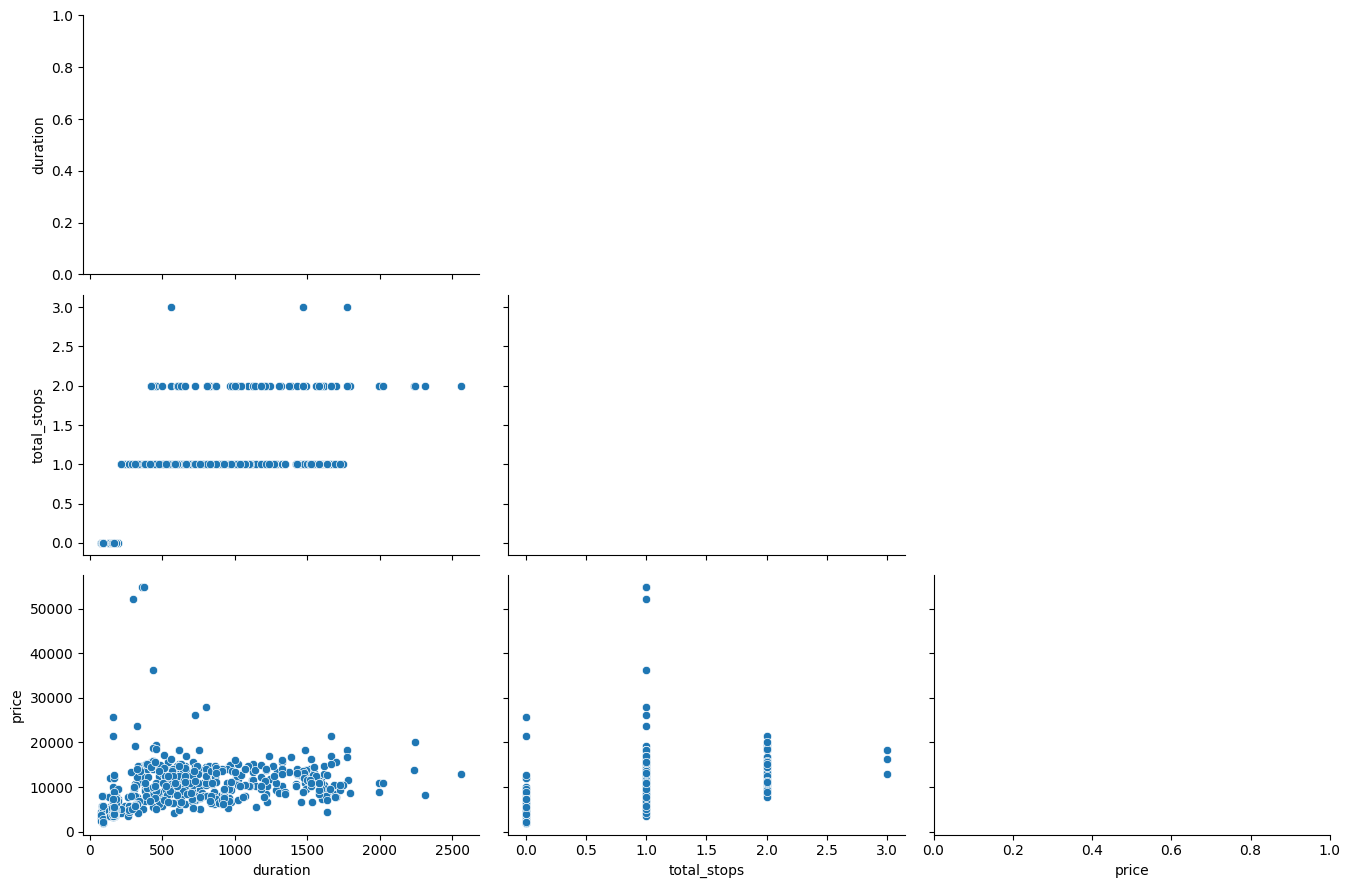

In [22]:
eda_helper_functions.pair_plots(train)

### Correlation analysis

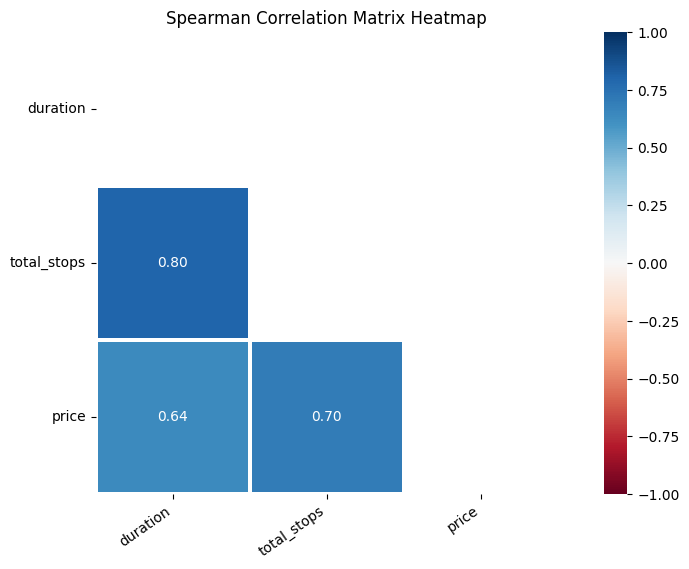

In [23]:
eda_helper_functions.correlation_heatmap(train)

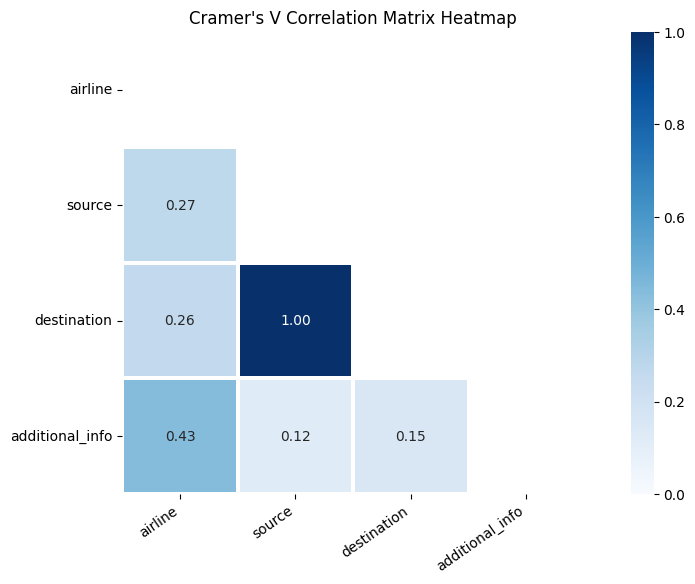

In [24]:
eda_helper_functions.cramersV_heatmap(train)